# Seoul Bike Sharing Demand dataset

In this notebook we explore the Seoul Bike Sharing Demand dataset, which is available on the UCI Machine Learning Repository. The dataset is available at the following link: https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand.

Let us import the necessary libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import torch

### Loading the dataset and data preprocessing

In [2]:
bike_data = pd.read_csv('../datasets/SeoulBikeData.csv')

Let us inspect the dataset.

The dataset contains the hourly count of bike rentals in Seoul Bike stations. The dataset has 8760 data points. For each data point, 14 features are provided.

In [3]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

In [4]:
bike_data.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


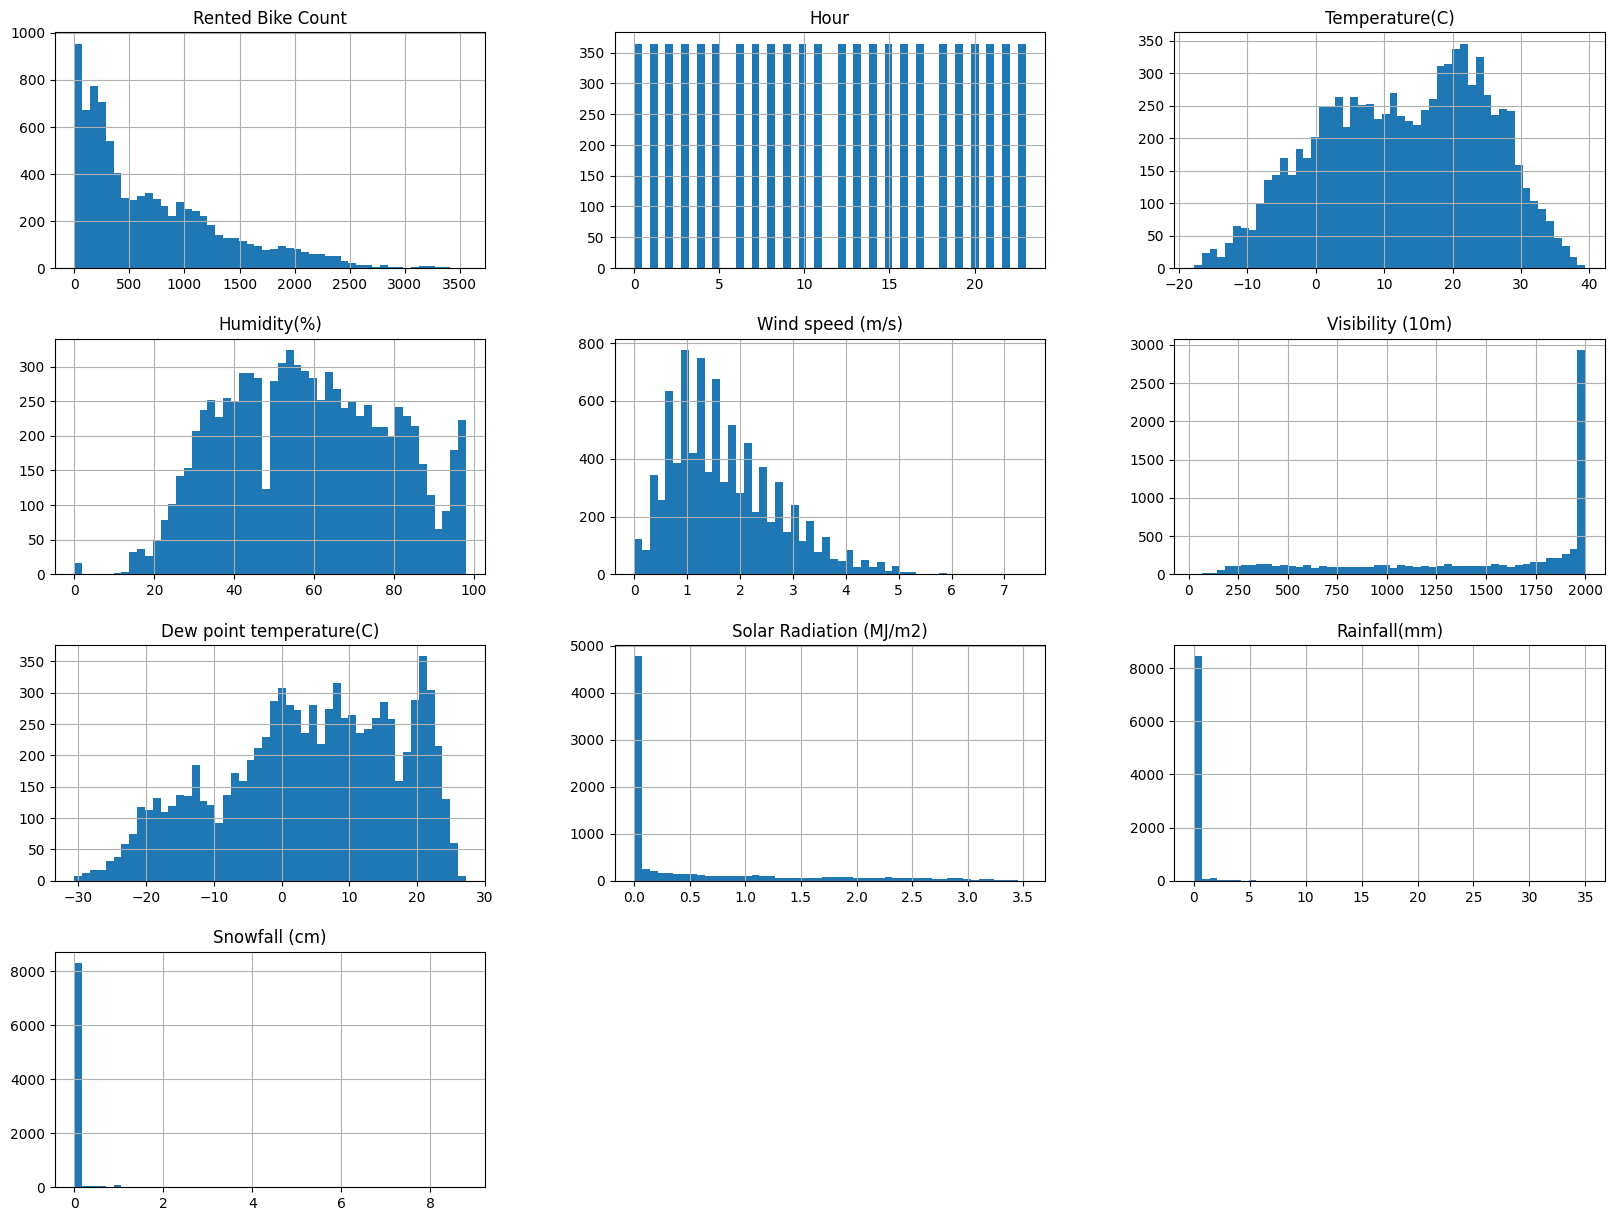

In [5]:
_ = bike_data.hist(bins=50, figsize=(20,15))

We notice that the data type of some data is not a numerical value, so we need to preprocess the data before we can use it for training a machine learning model.

First of all, we convert the date in the correct data type. 

In [6]:
bike_data['Date'] = pd.to_datetime(bike_data['Date'], format='%d/%m/%Y')

Let us separate the date into year, month, day.

In [7]:
bike_data['Year'] = bike_data['Date'].dt.year
bike_data['Month'] = bike_data['Date'].dt.month
bike_data['DayOfMonth'] = bike_data['Date'].dt.day
bike_data['DayOfWeek'] = bike_data['Date'].dt.dayofweek

It is convenient to preprocess these columns to include the cyclical nature of time. For example, the month of December is closer to January than to July. We can encode this by using the sine and cosine functions to transform the month and day columns into two dimensions. The same can be done for the hour of the day.

In [8]:
bike_data['Month-sin'] = torch.sin(2 * torch.tensor(bike_data['Month']) * torch.pi / 12)
bike_data['Month-cos'] = torch.cos(2 * torch.tensor(bike_data['Month']) * torch.pi / 12)
bike_data['DayOfMonth-sin'] = torch.sin(2 * torch.tensor(bike_data['DayOfMonth']) * torch.pi / 31)
bike_data['DayOfMonth-cos'] = torch.cos(2 * torch.tensor(bike_data['DayOfMonth']) * torch.pi / 31)
bike_data['DayOfWeek-sin'] = torch.sin(2 * torch.tensor(bike_data['DayOfWeek']) * torch.pi / 7)
bike_data['DayOfWeek-cos'] = torch.cos(2 * torch.tensor(bike_data['DayOfWeek']) * torch.pi / 7)
bike_data['Hour-sin'] = torch.sin(2 * torch.tensor(bike_data['Hour']) * torch.pi / 24)
bike_data['Hour-cos'] = torch.cos(2 * torch.tensor(bike_data['Hour']) * torch.pi / 24)

To understand this, let us plot the points on a circle.

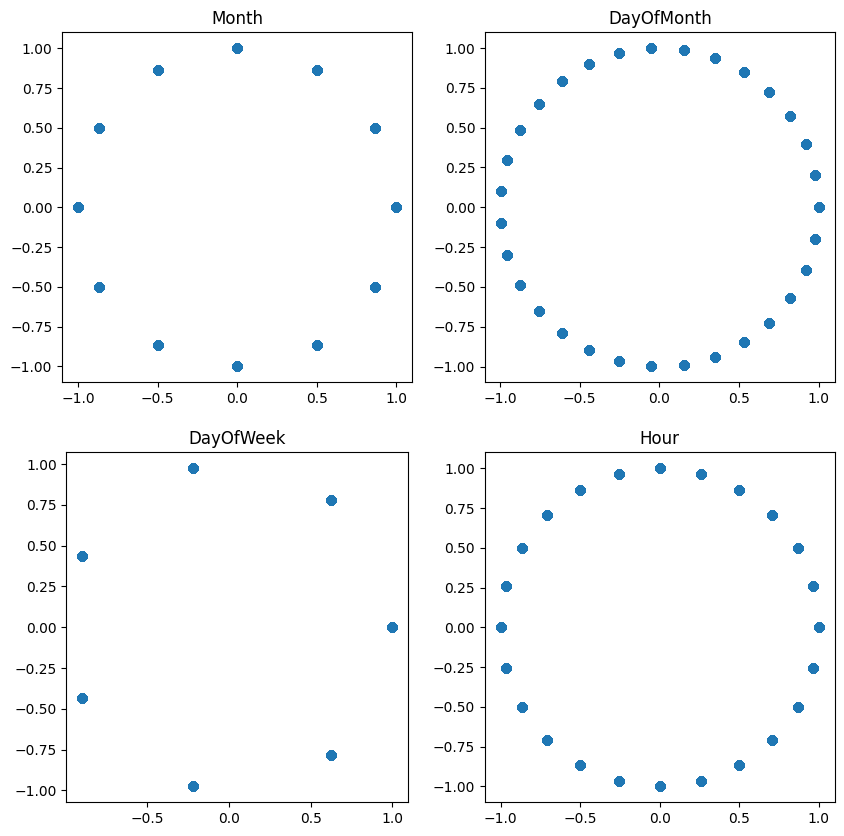

In [9]:
fig = plt.figure(figsize=(10, 10))
for i, key in enumerate(['Month', 'DayOfMonth', 'DayOfWeek', 'Hour']):
    ax = fig.add_subplot(2,2,i+1)
    ax.plot(bike_data[key+'-cos'], bike_data[key+'-sin'], 'o')
    ax.set_aspect('equal')
    ax.set_title(key)

We can drop the original columns (they would be redundant).

In [10]:
bike_data.drop(['Date', 'Hour', 'Month', 'DayOfMonth', 'DayOfWeek'], axis=1, inplace=True)

We can do the same for seasons. First we need to convert the season column to numbers.

In [11]:
seasons = bike_data['Seasons'].unique().tolist()

In [12]:
def season_to_int(season):
    return seasons.index(season)
bike_data['Seasons'] = bike_data['Seasons'].apply(season_to_int)

In [13]:
bike_data.head()

,Rented Bike Count,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,...,Functioning Day,Year,Month-sin,Month-cos,DayOfMonth-sin,DayOfMonth-cos,DayOfWeek-sin,DayOfWeek-cos,Hour-sin,Hour-cos
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,...,Yes,2017,1.748456e-07,1.0,0.201299,0.97953,-0.433884,-0.900969,0.000000,1.000000
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,...,Yes,2017,1.748456e-07,1.0,0.201299,0.97953,-0.433884,-0.900969,0.258819,0.965926
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,...,Yes,2017,1.748456e-07,1.0,0.201299,0.97953,-0.433884,-0.900969,0.500000,0.866025
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,...,Yes,2017,1.748456e-07,1.0,0.201299,0.97953,-0.433884,-0.900969,0.707107,0.707107
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,...,Yes,2017,1.748456e-07,1.0,0.201299,0.97953,-0.433884,-0.900969,0.866025,0.500000


In [14]:
bike_data['Seasons-cos'] = torch.cos(2 * torch.tensor(bike_data['Seasons']) * torch.pi / 4)
bike_data['Seasons-sin'] = torch.sin(2 * torch.tensor(bike_data['Seasons']) * torch.pi / 4)
bike_data.drop('Seasons', axis=1, inplace=True)

Finally, we convert the categorical columns into numerical values using one-hot encoding.

In [15]:
bike_data['Holiday'].unique()

array(['No Holiday', 'Holiday'], dtype=object)

In [16]:
def holiday_to_int(holiday):
  if holiday == 'No Holiday':
    return 0
  elif holiday == 'Holiday':
    return 1
bike_data['Holiday'] = bike_data['Holiday'].apply(holiday_to_int)

In [17]:
bike_data['Functioning Day'].unique()

array(['Yes', 'No'], dtype=object)

In [18]:
def functioning_day_to_int(functioning_day):
  if functioning_day == 'No':
    return 0
  elif functioning_day == 'Yes':
    return 1
bike_data['Functioning Day'] = bike_data['Functioning Day'].apply(functioning_day_to_int)

Now all the columns are numerical values. 

In [19]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rented Bike Count         8760 non-null   int64  
 1   Temperature(C)            8760 non-null   float64
 2   Humidity(%)               8760 non-null   int64  
 3   Wind speed (m/s)          8760 non-null   float64
 4   Visibility (10m)          8760 non-null   int64  
 5   Dew point temperature(C)  8760 non-null   float64
 6   Solar Radiation (MJ/m2)   8760 non-null   float64
 7   Rainfall(mm)              8760 non-null   float64
 8   Snowfall (cm)             8760 non-null   float64
 9   Holiday                   8760 non-null   int64  
 10  Functioning Day           8760 non-null   int64  
 11  Year                      8760 non-null   int32  
 12  Month-sin                 8760 non-null   float32
 13  Month-cos                 8760 non-null   float32
 14  DayOfMon

We convert all numbers to float32.

In [20]:
bike_data = bike_data.astype('float32')

In [21]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rented Bike Count         8760 non-null   float32
 1   Temperature(C)            8760 non-null   float32
 2   Humidity(%)               8760 non-null   float32
 3   Wind speed (m/s)          8760 non-null   float32
 4   Visibility (10m)          8760 non-null   float32
 5   Dew point temperature(C)  8760 non-null   float32
 6   Solar Radiation (MJ/m2)   8760 non-null   float32
 7   Rainfall(mm)              8760 non-null   float32
 8   Snowfall (cm)             8760 non-null   float32
 9   Holiday                   8760 non-null   float32
 10  Functioning Day           8760 non-null   float32
 11  Year                      8760 non-null   float32
 12  Month-sin                 8760 non-null   float32
 13  Month-cos                 8760 non-null   float32
 14  DayOfMon

In [22]:
bike_data.describe()

,Rented Bike Count,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,...,Month-sin,Month-cos,DayOfMonth-sin,DayOfMonth-cos,DayOfWeek-sin,DayOfWeek-cos,Hour-sin,Hour-cos,Seasons-cos,Seasons-sin
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,...,8.760000e+03,8.760000e+03,8.760000e+03,8760.000000,8760.000000,8760.000000,8.760000e+03,8.760000e+03,8.760000e+03,8.760000e+03
mean,704.602051,12.882922,58.226257,1.724909,1436.825806,4.073813,0.569111,0.148687,0.075068,0.049315,...,-5.381085e-03,-2.372672e-03,1.631926e-03,-0.018900,-0.001189,-0.002468,-5.062312e-09,1.491477e-08,-5.479451e-03,2.739712e-03
std,644.997437,11.944825,20.362413,1.036300,608.298706,13.060369,0.868746,1.128193,0.436746,0.216537,...,7.056721e-01,7.085948e-01,7.135176e-01,0.700462,0.706542,0.707747,7.071471e-01,7.071472e-01,7.061566e-01,7.081099e-01
min,0.000000,-17.799999,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,0.000000,...,-1.000000e+00,-1.000000e+00,-9.987165e-01,-0.994869,-0.974928,-0.900969,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
25%,191.000000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,0.000000,...,-8.660252e-01,-8.660253e-01,-7.247925e-01,-0.758758,-0.781832,-0.900969,-7.071066e-01,-7.071068e-01,-1.000000e+00,-8.742278e-08
50%,504.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,0.000000,...,-8.742278e-08,-4.371139e-08,1.748456e-07,-0.050649,0.000000,-0.222521,-4.371139e-08,-1.589325e-08,-4.371139e-08,-8.742278e-08
75%,1065.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,0.000000,...,5.000000e-01,8.660254e-01,7.247928e-01,0.688967,0.781832,0.623490,7.071068e-01,7.071068e-01,1.192488e-08,1.000000e+00
max,3556.000000,39.400002,98.000000,7.400000,2000.000000,27.200001,3.520000,35.000000,8.800000,1.000000,...,1.000000e+00,1.000000e+00,9.987165e-01,1.000000,0.974928,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


We split the data into training and testing sets.

In [23]:
torch.manual_seed(42)
shuffled_indices = torch.randperm(len(bike_data))
train_indices = shuffled_indices[:int(0.8*len(bike_data))]
test_indices = shuffled_indices[int(0.8*len(bike_data)):]
bike_data_train = bike_data.iloc[train_indices].copy()
bike_data_test = bike_data.iloc[test_indices].copy()

Before training the model, we scale the data. We do this on the training set and apply the same transformation to the testing set (because we should not assume that we know the mean and standard deviation of the testing set). We do not scale the columns that we have transformed using the sine and cosine functions (they are already between -1 and 1).

In [24]:
keys = ['Rented Bike Count', 'Temperature(C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Year']

In [25]:
scaling_parameters = {}
for key in keys:
  scaling_parameters[key] = {'mean': bike_data_train[key].mean(), 'std': bike_data_train[key].std()}
  bike_data_train[key] = (bike_data_train[key] - scaling_parameters[key]['mean']) / scaling_parameters[key]['std']
  bike_data_test[key] = (bike_data_test[key] - scaling_parameters[key]['mean']) / scaling_parameters[key]['std']

In [26]:
bike_data_train.describe()

,Rented Bike Count,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,...,Month-sin,Month-cos,DayOfMonth-sin,DayOfMonth-cos,DayOfWeek-sin,DayOfWeek-cos,Hour-sin,Hour-cos,Seasons-cos,Seasons-sin
count,7.008000e+03,7.008000e+03,7.008000e+03,7.008000e+03,7.008000e+03,7.008000e+03,7.008000e+03,7.008000e+03,7.008000e+03,7008.000000,...,7.008000e+03,7.008000e+03,7.008000e+03,7008.000000,7008.000000,7008.000000,7.008000e+03,7.008000e+03,7.008000e+03,7008.000000
mean,-3.919209e-08,2.612806e-08,1.469704e-08,8.654921e-08,5.946856e-08,2.177339e-08,-1.741871e-08,4.899012e-09,-7.076351e-09,0.049229,...,-3.836990e-03,1.207825e-03,-8.815844e-04,-0.020049,-0.001672,-0.002678,-2.211560e-03,-4.082666e-03,-1.712331e-03,0.002854
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.999999e-01,9.999999e-01,9.999999e-01,9.999999e-01,1.000000e+00,0.216362,...,7.077520e-01,7.065505e-01,7.132190e-01,0.700756,0.708588,0.705716,7.060082e-01,7.082892e-01,7.035131e-01,0.710775
min,-1.083255e+00,-2.570740e+00,-2.851480e+00,-1.668070e+00,-2.302386e+00,-2.651307e+00,-6.570615e-01,-1.309884e-01,-1.725057e-01,0.000000,...,-1.000000e+00,-1.000000e+00,-9.987165e-01,-0.994869,-0.974928,-0.900969,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000
25%,-7.922645e-01,-7.923507e-01,-7.925367e-01,-7.960631e-01,-8.245643e-01,-6.674747e-01,-6.570615e-01,-1.309884e-01,-1.725057e-01,0.000000,...,-8.660252e-01,-5.000001e-01,-7.247925e-01,-0.758758,-0.781832,-0.900969,-7.071065e-01,-7.071068e-01,-4.371139e-08,-1.000000
50%,-3.203678e-01,6.328943e-02,-5.719985e-02,-2.147250e-01,4.250163e-01,7.550506e-02,-6.455716e-01,-1.309884e-01,-1.725057e-01,0.000000,...,1.748456e-07,-4.371139e-08,1.748456e-07,-0.050649,0.000000,-0.222521,-8.742278e-08,-4.371139e-08,-4.371139e-08,0.000000
75%,5.549122e-01,8.098773e-01,7.761819e-01,5.603923e-01,9.274758e-01,8.184847e-01,4.143651e-01,-1.309884e-01,-1.725057e-01,0.000000,...,5.000000e-01,8.660254e-01,7.247928e-01,0.688967,0.781832,0.623490,7.071068e-01,7.071068e-01,1.192488e-08,1.000000
max,4.391671e+00,2.227556e+00,1.952721e+00,5.501766e+00,9.274758e-01,1.775933e+00,3.387358e+00,2.897912e+01,1.947747e+01,1.000000,...,1.000000e+00,1.000000e+00,9.987165e-01,1.000000,0.974928,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000


We prepare the tensors so that they can be fed into the model.

In [27]:
x_train = torch.tensor(bike_data_train.drop('Rented Bike Count', axis=1).values)
y_train = torch.tensor(bike_data_train['Rented Bike Count'].values).reshape(-1, 1)
x_test = torch.tensor(bike_data_test.drop('Rented Bike Count', axis=1).values)
y_test = torch.tensor(bike_data_test['Rented Bike Count'].values).reshape(-1, 1)

In [28]:
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: torch.Size([7008, 21])
Shape of y_train: torch.Size([7008, 1])
Shape of x_test: torch.Size([1752, 21])
Shape of y_test: torch.Size([1752, 1])


In [29]:
n_training_samples = x_train.shape[0]
n_test_samples = x_test.shape[0]
n_features = x_train.shape[1]
print(f"Number of training samples: {n_training_samples}")
print(f"Number of test samples: {n_test_samples}")
print(f"Number of features: {n_features}")

Number of training samples: 7008
Number of test samples: 1752
Number of features: 21


### Linear regression

Let us start with our benchmark model: linear regression. We find the optimal weights and bias by solving the linear system of equations found in previous lectures. See the [notes](../notes/02%20-%20Linear%20regression.pdf) and the [notebook](../notebooks/01-linear_regression_house_prices.ipynb) for more details.

In [30]:
x_tilde = torch.cat([x_train, torch.ones(n_training_samples, 1)], axis=1)
A = ( x_tilde.t()@ x_tilde )/x_tilde.shape[0]
c = x_tilde.t() @ y_train / x_tilde.shape[0]
solution = torch.linalg.solve(A, c)
w = solution[:-1]
b = solution[-1]

We measure the performance of the model using the coefficient of determination $R^2$.

In [31]:
R2 = 1 - torch.sum((y_test - x_test @w - b)**2)/torch.sum((y_test - y_test.mean())**2)
print(f"R2 on the test set: {R2}")

R2 on the test set: 0.5296326279640198


### Linear regression with the `mydl` library

We understood that linear regression is equivalent to a neural network with a single layer and no activation function. 

Let us import the classes from the `mydl` library.

In [ ]:
%cd .. 
from mydl.architecture import * # import all the classes and functions from the architecture module
from mydl.layers import * # import all the classes and functions from the layers module
from mydl.losses import * # import all the classes and functions from the losses module
from mydl.optimizers import * # import all the classes and functions from the optimizers module
%cd notebooks

/Users/orlando/GitHub/SCUDO-MMinDL
[Errno 2] No such file or directory: 'notebooks # change back to the notebooks directory'
/Users/orlando/GitHub/SCUDO-MMinDL


/Users/orlando/GitHub/SCUDO-MMinDL/.venv/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]
/Users/orlando/GitHub/SCUDO-MMinDL/.venv/lib/python3.12/site-packages/IPython/core/magics/osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})


We build a simple neural network with a single layer and no activation function. 

In [33]:
model = Sequential([Linear(n_features, 1)])

We use the mean squared error as the loss function.

In [34]:
loss = MSE()

We use gradient descent to optimize the weights and bias.

In [35]:
optimizer = GD(learning_rate=0.1)

Let us train the model.

In [36]:
n_epochs = 1000
losses_train = model.train(x_train, y_train, loss, optimizer, n_epochs)

Training the network...
Training complete.


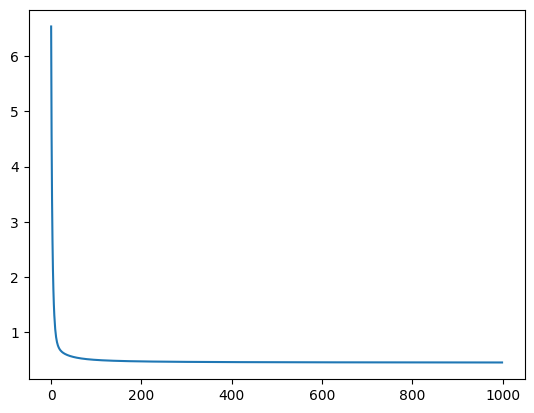

In [37]:
plt.plot(losses_train)

In [38]:
y_pred = model.forward(x_test)
R2 = 1 - torch.sum((y_test - y_pred)**2)/torch.sum((y_test - y_test.mean())**2)
print(f"R2 on the test set: {R2}")

R2 on the test set: 0.5274727940559387


Of course, the performance is comparable to that of the linear regression model.

### A bad model

Let us build a bad model. We build a neural network with a sequence of linear layers and no activation functions. It has more parameters than the linear regression model, but it is not more expressive.

In [39]:
layers = [Linear(n_features, 64), 
          Linear(64, 32),
          Linear(32, 16),
          Linear(16, 1)]
model = Sequential(layers)

In [40]:
loss = MSE()

We need many iterations to train the model.

In [41]:
n_epochs = 1
optimizer = GD(learning_rate=1e-6)
losses_train = model.train(x_train, y_train, loss, optimizer, n_epochs)

Training the network...
Training complete.


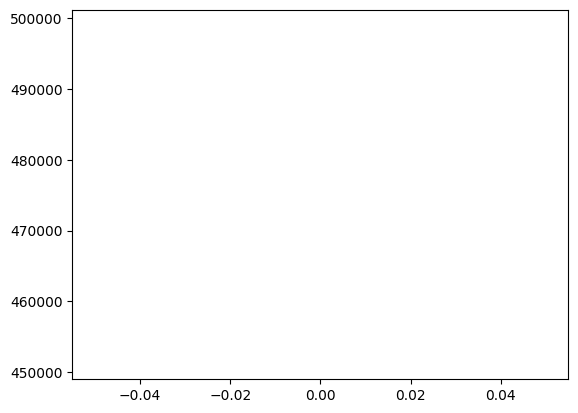

In [42]:
plt.plot(losses_train)

In [43]:
y_pred = model.forward(x_test)
R2 = 1 - torch.sum((y_test - y_pred)**2)/torch.sum((y_test - y_test.mean())**2)
print(f"R2 on the test set: {R2}")

R2 on the test set: -157906.5625


As we see, the performance is comparable to that of the linear regression model. It means that this model is not more expressive than the linear regression model.

### Using nonlinear activation functions

We build a neural network with a sequence of linear layers and Sigmoid activation functions.

In [44]:
layers = [Linear(n_features, 64),
          Sigmoid(),
          Linear(64, 32),
          Sigmoid(),
          Linear(32, 16),
          Sigmoid(),
          Linear(16, 1)]
model = Sequential(layers)

In [45]:
n_epochs = 1
optimizer = GD(learning_rate=1e-1)
losses_train = model.train(x_train, y_train, loss, optimizer, n_epochs)
print(losses_train[-1])

Training the network...
Training complete.
24.357528686523438


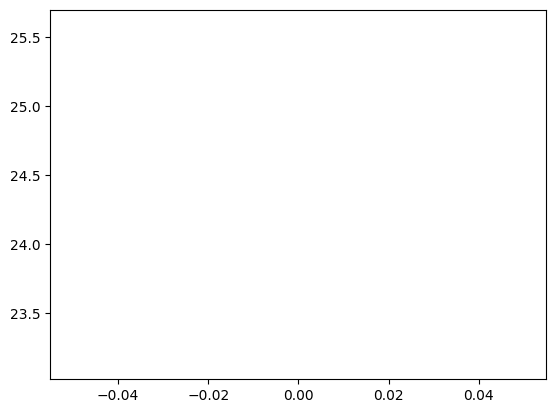

In [46]:
plt.plot(losses_train)

In [47]:
y_pred = model.forward(x_test)
R2 = 1 - torch.sum((y_test - y_pred)**2)/torch.sum((y_test - y_test.mean())**2)
print(f"R2 on the test set: {R2}")

R2 on the test set: -16.235519409179688


The improvement is significant. The model is more expressive than the linear regression model.

### Using mini-batch stochastic gradient descent

We build a neural network with a sequence of linear layers and Sigmoid activation functions. We use the stochastic gradient descent optimizer.

In [55]:
layers = [Linear(n_features, 64),
          Sigmoid(),
          Linear(64, 32),
          Sigmoid(),
          Linear(32, 16),
          Sigmoid(),
          Linear(16, 1)]
model = Sequential(layers)

In [62]:
n_epochs = 100
optimizer = GD(learning_rate=1e-1)
losses_train = model.train(x_train, y_train, loss, optimizer, n_epochs, batch_size=32)

Training the network...
Training complete.


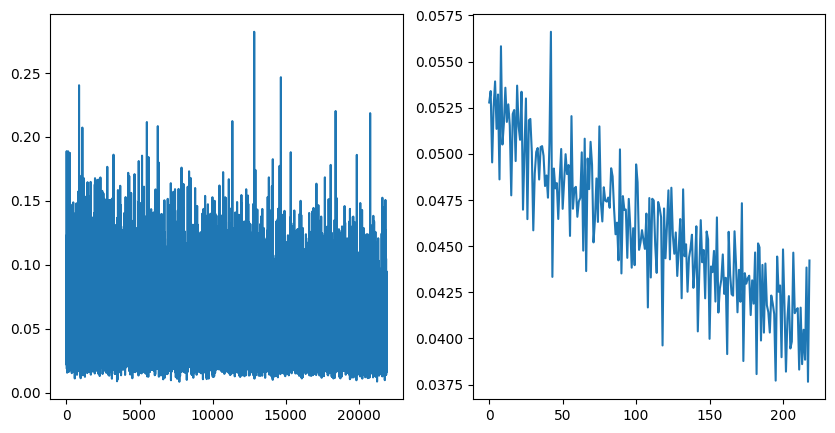

In [65]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121)
ax1.plot(losses_train)
ax2 = fig.add_subplot(122)
averaged_losses_train = [sum(losses_train[i:i+100])/100 for i in range(0, len(losses_train), 100)]
ax2.plot(averaged_losses_train)

In [66]:
y_pred = model.forward(x_test)
R2 = 1 - torch.sum((y_test - y_pred)**2)/torch.sum((y_test - y_test.mean())**2)
print(f"R2 on the test set: {R2}")

R2 on the test set: 0.9047886729240417
